## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Testing equation

$$ 
\begin{cases} 
    x' = -y\\
    y' = x \\
    x(0) = 1 \\
    y(0) = 1
\end{cases}
$$
$$
x_{ex}(t) = \cos(t) - \sin(t)\\
y_{ex}(t) = \cos(t) + \sin(t)
$$

## Hyperparameters

In [2]:
T = 6.28
dt = 0.02
u0 = [1, 1]
def f(v, t): return np.array([-v[1], v[0]])
def u_ex(t): return np.cos(t)-np.sin(t)


def v_ex(t): return np.cos(t)+np.sin(t)

## Theta Method

In [3]:
from theta_method import ThetaMethod

theta = 1

TM = ThetaMethod(T=T, dt=dt, u0=u0, f=f, theta=theta, eqtype='ODE')

TM.generate()

plt.plot(TM.t, TM.u[0, :], 'r.-')
plt.plot(TM.t, u_ex(TM.times), 'b-')
plt.title("u")
plt.legend(['u', 'u_ex'])
plt.show()

plt.plot(TM.t, TM.u[1, :], 'r.-')
plt.plot(TM.t, v_ex(TM.times), 'b-')
plt.title("v")
plt.legend(['v', 'v_ex'])
plt.show()

AttributeError: 'ThetaMethod' object has no attribute 'times'

## Runge-Kutta

### Explicit

In [47]:
from datagen.DataGen import RK_explicit

but_A = np.array([[0, 0], [0.5, 0]], dtype=np.float32)
but_b = np.array([0, 1], dtype=np.float32)
but_c = np.array([0, 0.5], dtype=np.float32)

RK = RK_explicit(T=T, dt=dt, u0=u0, but_A=but_A,
                 but_b=but_b, but_c=but_c, f=f, eqtype='ODE')

RK.generate()

plt.plot(RK.times, RK.u[0, :], 'r.-')
plt.plot(RK.times, u_ex(RK.times), 'b-')
plt.title("u")
plt.legend(['u', 'u_ex'])
plt.show()

plt.plot(RK.times, RK.u[1, :], 'r.-')
plt.plot(RK.times, v_ex(RK.times), 'b-')
plt.title("v")
plt.legend(['v', 'v_ex'])
plt.show()

### Implicit

/home/daan/projects/pacs/scripts/datagen/DataGen.py:182: UserWarning: implicit method called but semi-implicit butcher array given
  warnings.warn("implicit method called but semi-implicit butcher array given")


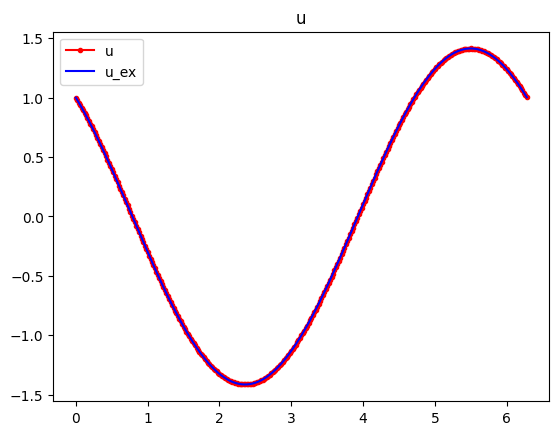

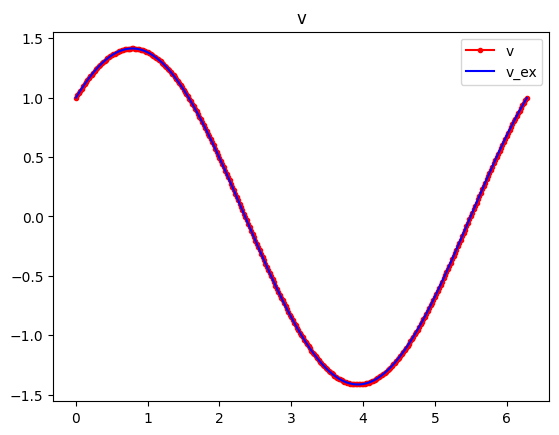

In [5]:
from DataGen import RK_implicit

but_A = np.array([[0, 0], [0.5, 0.5]], dtype=np.float32)
but_b = np.array([0.5, 0.5], dtype=np.float32)
but_c = np.array([0, 1], dtype=np.float32)

RK = RK_implicit(T=T, dt=dt, u0=u0, but_A=but_A,
                 but_b=but_b, but_c=but_c, f=f, eqtype='ODE')

RK.generate()

plt.plot(RK.times, RK.u[0, :], 'r.-')
plt.plot(RK.times, u_ex(RK.times), 'b-')
plt.title("u")
plt.legend(['u', 'u_ex'])
plt.show()

plt.plot(RK.times, RK.u[1, :], 'r.-')
plt.plot(RK.times, v_ex(RK.times), 'b-')
plt.title("v")
plt.legend(['v', 'v_ex'])
plt.show()